In [78]:
#At first, we import python libraries that we need
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import tkinter as tk
from tkinter import messagebox


In [79]:
train_df = pd.read_csv("car_prices/train.csv")
test_df = pd.read_csv("car_prices/test.csv")

train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [80]:
len(train_df)

19237

In [81]:
test_df.columns

Index(['ID', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags', 'Price'],
      dtype='object')

In [82]:
train_df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [83]:
train_df['Levy'].unique()

array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [84]:
print(train_df['Price'].unique())

[13328 16621  8467 ... 56814 63886 22075]


In [85]:
train_df.replace('-',pd.NA,inplace=True)
test_df.replace('-',pd.NA,inplace=True)

In [86]:
train_df['Price'].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075], dtype=int64)

In [87]:
# Data Completence

# Check for missing values
missing_values = train_df.isna().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(train_df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
ID                   0.000000
Price                0.000000
Levy                30.248999
Manufacturer         0.000000
Model                0.000000
Prod. year           0.000000
Category             0.000000
Leather interior     0.000000
Fuel type            0.000000
Engine volume        0.000000
Mileage              0.000000
Cylinders            0.000000
Gear box type        0.000000
Drive wheels         0.000000
Doors                0.000000
Wheel                0.000000
Color                0.000000
Airbags              0.000000
dtype: float64


In [88]:
# Data Completence

# Check for missing values
missing_values = test_df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(test_df)) * 100

# Print the missing values count and percentage for each column
print("\nMissing Values Percentage:")
print(missing_percentage)


Missing Values Percentage:
ID                    0.000000
Levy                 29.763493
Manufacturer          0.000000
Model                 0.000000
Prod. year            0.000000
Category              0.000000
Leather interior      0.000000
Fuel type             0.000000
Engine volume         0.000000
Mileage               0.000000
Cylinders             0.000000
Gear box type         0.000000
Drive wheels          0.000000
Doors                 0.000000
Wheel                 0.000000
Color                 0.000000
Airbags               0.000000
Price               100.000000
dtype: float64


In [89]:
# Count the number of null or missing values in each row
null_counts = train_df.isnull().sum(axis=1)

# Filter rows with missing values
filtered_df = train_df[null_counts <= 0]

# Print the resulting DataFrame
print(filtered_df,filtered_df.__len__())

             ID  Price  Levy   Manufacturer     Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS    RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET   Equinox        2011       Jeep   
3      45769185   3607   862           FORD    Escape        2011       Jeep   
4      45809263  11726   446          HONDA       FIT        2014  Hatchback   
5      45802912  39493   891        HYUNDAI  Santa FE        2016       Jeep   
...         ...    ...   ...            ...       ...         ...        ...   
19231  45772306   5802  1055  MERCEDES-BENZ     E 350        2013      Sedan   
19233  45778856  15681   831        HYUNDAI    Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI    Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET   Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI    Sonata        2012      Sedan   

      Leather interior Fuel type Engine

In [90]:
test_df=test_df.drop('Price',axis=1)

In [91]:
# Count the number of null or missing values in each row
null_counts = test_df.isnull().sum(axis=1)

# Filter rows with missing values
test_filtered = test_df[null_counts <= 0]

# Print the resulting DataFrame
print(test_filtered,test_filtered.__len__())

            ID  Levy   Manufacturer    Model  Prod. year   Category  \
3     45797981   975          VOLVO     XC90        2012       Jeep   
5     45812490   639            BMW      320        2014      Sedan   
6     45772399  1646          LEXUS   GX 460        2015       Jeep   
7     45766222  1172  MERCEDES-BENZ    E 350        2011      Sedan   
8     45803362   891        HYUNDAI   Sonata        2016      Sedan   
...        ...   ...            ...      ...         ...        ...   
8239  45787008   645         TOYOTA    Prius        2011      Sedan   
8240  44824410  1357           FIAT    Stilo        2004  Universal   
8242  45649860  1646          LEXUS   GX 460        2015       Jeep   
8243  45809706   784         TOYOTA     Aqua        2017  Hatchback   
8244  45813163   448          HONDA  Insight        2012  Hatchback   

     Leather interior Fuel type Engine volume    Mileage  Cylinders  \
3                 Yes    Petrol           3.2  143000 km          6   
5    

In [92]:
# Choose important features     

drop = ['Manufacturer', 'Model','Wheel', 'Color']

train_filtered= filtered_df.drop(columns=drop)


In [93]:
train_filtered['Prod. year'].unique()

array([2010, 2011, 2014, 2016, 2013, 2018, 2006, 2008, 2012, 2017, 2009,
       2007, 2019, 2015, 2003, 2004, 2001, 2000, 2020, 2005, 1996, 1992,
       2002, 1995, 1997, 1993, 1998, 1999, 1965, 1994], dtype=int64)

In [94]:
train_df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [95]:
train_filtered['Doors'].replace('04-May',4,inplace=True)
train_filtered['Doors'].replace('02-Mar',2,inplace=True)
train_filtered['Doors'].replace('>5',7,inplace=True)
train_filtered['Mileage']=train_filtered['Mileage'].str.rstrip('km').astype(int)
train_filtered['Levy']=train_filtered['Levy'].astype(int)

# Test data clean 
test_filtered['Doors'].replace('04-May',4,inplace=True)
test_filtered['Doors'].replace('02-Mar',2,inplace=True)
test_filtered['Doors'].replace('>5',7,inplace=True)
test_filtered['Mileage']=test_filtered['Mileage'].str.rstrip('km').astype(int)
test_filtered['Levy']=test_filtered['Levy'].astype(int)
test_filtered['Mileage'].unique()

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_16788\3030197143.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['Doors'].replace('04-May',4,inplace=True)
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_16788\3030197143.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_filtered['Doors'].replace('02-Mar',2,inplace=True)
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_16788\3030197143.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

array([143000,  59733, 102907, ..., 146697, 148633, 283000])

In [96]:
# Identify categorical columns by checking their data types
categorical_columns = train_filtered.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Gear box type', 'Drive wheels']


In [97]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=categorical_columns)


train_filtered = encoder.fit_transform(train_filtered)

test_filtered = encoder.fit_transform(test_filtered)


Positive Correlations:
                        ID     Price      Levy  Prod. year  Category  \
ID                1.000000       NaN       NaN    0.001991       NaN   
Price                  NaN  1.000000  0.063291    0.289959       NaN   
Levy                   NaN  0.063291  1.000000         NaN  0.008978   
Prod. year        0.001991  0.289959       NaN    1.000000       NaN   
Category               NaN       NaN  0.008978         NaN  1.000000   
Leather interior       NaN       NaN       NaN         NaN  0.082177   
Fuel type         0.108190  0.152548  0.079870    0.060989  0.070691   
Engine volume          NaN  0.104179  0.161012         NaN  0.028920   
Mileage           0.003335       NaN  0.023624         NaN  0.031468   
Cylinders         0.029300  0.016204  0.588695         NaN       NaN   
Gear box type          NaN  0.072106  0.024300         NaN  0.116450   
Drive wheels      0.008350  0.008265       NaN    0.030185  0.360676   
Doors             0.018936  0.013712     

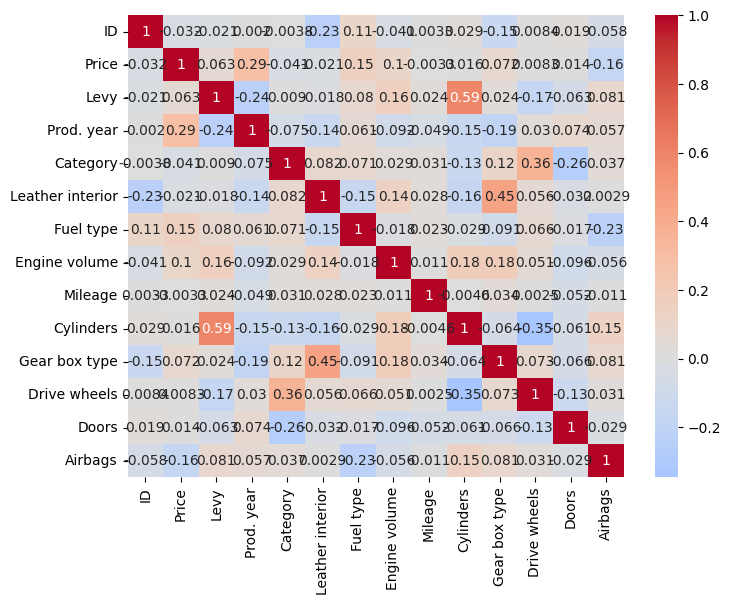

In [98]:
import seaborn as sns
# Heatmap is very effecient in finding collerations between features

# Calculate the correlation matrix
correlation_matrix = train_filtered.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', center=0)

# Filter out only the positively correlated values
positive_correlations = correlation_matrix[correlation_matrix > 0]

# Output the positive correlations
print("Positive Correlations:")
print(positive_correlations)

plt.show()

## As seen the colleration between features and prices are very week, hence it's very hard to get good prediction results from this dataset

In [99]:
# Step 3: Select features with positive correlation with the price
target_variable = 'Price'  # Replace 'price' with the name of your target variable column
positive_correlations = correlation_matrix[target_variable].drop(target_variable)
positively_correlated_features = positive_correlations[positive_correlations > 0].index.tolist()

# Step 4: Use the selected features in your machine learning prediction
X = train_filtered[positively_correlated_features]
y = train_filtered[target_variable]

# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Now, X contains the features positively correlated with the price,
# and y contains the target variable 'price' for machine learning modeling.

# Print the positively correlated features
print("Positively Correlated Features with 'price':")
print(positively_correlated_features)

Positively Correlated Features with 'price':
['Levy', 'Prod. year', 'Fuel type', 'Engine volume', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors']


In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
# Step 5: Create and train the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [102]:
# Step 6: Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 393469136.70148706
R-squared (R2): 0.3332210825742885


## Neural network approach

In [103]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score


In [104]:
# Step 5: Standardize the input features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Create the MLP model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression task (1 neuron for price prediction)

# Step 7: Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# # Step 8: Train the model
# history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1)

# # Step 9: Make predictions on the test set
# y_pred = model.predict(X_test_scaled).flatten()

# # Step 10: Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE):", mse)
# print("R-squared (R2):", r2)